In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits

In [ ]:
# Load the load_digits dataset
digits = load_digits()


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

In [ ]:
# Create an instance of the ImageDataGenerator class with data augmentation settings
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)

In [ ]:
# Apply data augmentation on the training dataset and convert it to a numpy array
X_train_augmented = np.array([datagen.random_transform(x.reshape(8, 8, 1)).reshape(-1) for x in X_train])

In [ ]:
# Train an SVM model on the augmented training dataset
svm = make_pipeline(PCA(n_components=20), SVC())
svm.fit(X_train_augmented, y_train)


Pipeline(steps=[('pca', PCA(n_components=20)), ('svc', SVC())])

In [ ]:
# Evaluate the performance of the SVM model on the testing dataset
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.91      0.98      0.94        50
           2       0.79      0.89      0.84        47
           3       0.94      0.89      0.91        54
           4       0.94      1.00      0.97        60
           5       0.80      0.71      0.75        66
           6       0.82      0.92      0.87        53
           7       0.86      0.93      0.89        55
           8       0.97      0.81      0.89        43
           9       0.78      0.68      0.73        59

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.88      0.88      0.88       540



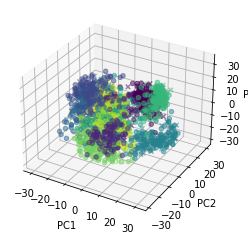

In [ ]:
# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, marker='o', alpha=0.5)
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_pred, marker='x', alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()